# Overlap of Tox21 compounds in PubChem with EU-ToxRisk case study compounds

* See [here](./case_study_compounds.ipynb) for further details of the EU-ToxRisk case study compounds.

* See [here](./Tox21_compounds.ipynb) for further details of the PubChem compounds.

### Configuration and Setup

In [1]:
%run setup.py

In [2]:
import sqlalchemy

### Config

In [3]:
# ChEMBL database connection details...

chembl = dict(
      driver = 'oracle'
    , host   = 'ora-vm5-023.ebi.ac.uk'
    , port   =  1531
    , dbname = 'chempro'
    , user   = 'francis'
    , passwd = 'francis'
)

# ChEMBL schema (version) to use...

schema = 'chembl_22'

In [4]:
# Directory for reading and writing data files...

data_dir = 'data'

### Initialisation

In [5]:
if not 'logger' in locals(): logger = make_logger.run(__name__)

In [6]:
engine = sqlalchemy.create_engine("{driver}://{user}:{passwd}@{host}:{port}/{dbname}".format(**chembl))

### Reload compounds

In [7]:
# Reload Tox21 compounds...

sid_mols_df = pd.read_pickle(os.path.join(data_dir, './sid_mols.pkl'))

sid_mols_df.shape

(14252, 7)

,SID,CID,parent_CID,smiles,inchi,inchikey,mol
0,312345403,6436006,5365247,CN(C)C/C=C(/C1=CC=C(C=C1)Br)\C2=CN=CC=C2,"InChI=1S/C16H17BrN2/c1-19(2)11-9-16(14-4-3-10-18-12-14)13-5-7-15(17)8-6-13/h3-10,12H,11H2,1-2H3/b16-9-",OYPPVKRFBIWMSX-SXGWCWSVSA-N,

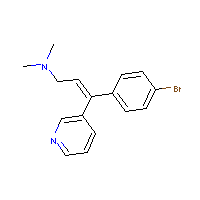

In [8]:
sid_mols_df.head(1)

In [9]:
# Load case-study compounds (from Anne)...

cs_cmpds_df = pd.read_pickle(os.path.join(data_dir, './case_study_compounds.pkl'))

cs_cmpds_df.shape

(176, 13)

,CAS,name,smiles,inchi,inchikey,Case Study 1,Case Study 2,Case Study 3,Case Study 4,Case Study 5,Case Study 6,Case Study 7,mol
0,,"2,2-dimethyl-pentanoic acid",CCCC(C)(C)C(=O)O,"InChI=1S/C7H14O2/c1-4-5-7(2,3)6(8)9/h4-5H2,1-3H3,(H,8,9)",ZRYCZAWRXHAAPZ-UHFFFAOYSA-N,✗,✓,✗,✗,✗,✗,✗,

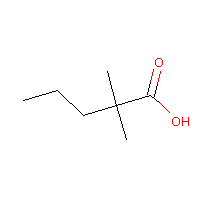

In [10]:
cs_cmpds_df.head(1)

In [11]:
case_study_inchikeys = set(cs_cmpds_df['inchikey'])

len(case_study_inchikeys)

176

In [12]:
tox21_inchikeys = set(sid_mols_df['inchikey'])

len(tox21_inchikeys)

9107

In [13]:
chembl_inchikeys = set(x['inchikey'] for x in engine.execute("""
select distinct
  d.standard_inchi_key as inchikey
from
       {schema}.assays              a
  join {schema}.activities          b on a.assay_id = b.assay_id
  join {schema}.molecule_hierarchy  c on b.molregno = c.molregno
  join {schema}.compound_structures d on c.parent_molregno = d.molregno
where
  a.description like 'PubChem BioAssay: Tox21. %%'
""".format(schema=schema)).fetchall())

len(chembl_inchikeys)

7868

In [14]:
case_study_and_tox21 = case_study_inchikeys.intersection(tox21_inchikeys)

len(case_study_and_tox21)

108

In [15]:
case_study_and_chembl = case_study_inchikeys.intersection(chembl_inchikeys)

len(case_study_and_chembl)

112

One compound in the case study compound set is not in the ChEMBL set...

In [16]:
case_study_and_tox21.difference(case_study_and_chembl)

{'QCDYQQDYXPDABM-UHFFFAOYSA-N'}

Five compounds in the case study compound set is not in the ChEMBL set...

In [17]:
case_study_and_chembl.difference(case_study_and_tox21)

{'JQXXHWHPUNPDRT-WLSIYKJHSA-N',
 'NXFQHRVNIOXGAQ-YCRREMRBSA-N',
 'UIFFUZWRFRDZJC-SBOOETFBSA-N',
 'USMZPYXTVKAYST-UHFFFAOYSA-N',
 'XMAYWYJOQHXEEK-ZEQKJWHPSA-N'}

Of these five, four are only recorded in ChEMBL as having been tested in cell viability assays...

In [18]:
sql = """
select distinct
    d.standard_inchi_key as inchikey
  , e.src_compound_id
  , a.description
from
       chembl_22.assays              a
  join chembl_22.activities          b on a.assay_id = b.assay_id
  join chembl_22.molecule_hierarchy  c on b.molregno = c.molregno
  join chembl_22.compound_structures d on c.parent_molregno = d.molregno
  join chembl_22.compound_records    e on b.record_id = e.record_id
where
  a.description like 'PubChem BioAssay: Tox21. %%'
and
  d.standard_inchi_key in ({inchikeys})
"""

inchikeys = ('NXFQHRVNIOXGAQ-YCRREMRBSA-N', 'UIFFUZWRFRDZJC-SBOOETFBSA-N', 'USMZPYXTVKAYST-UHFFFAOYSA-N', 'XMAYWYJOQHXEEK-ZEQKJWHPSA-N')

pd.read_sql_query(sql.format(inchikeys=','.join("'{}'".format(x) for x in inchikeys)), engine)

,inchikey,src_compound_id,description
0,USMZPYXTVKAYST-UHFFFAOYSA-N,26757136,PubChem BioAssay: Tox21. qHTS assay for cell viability of HEK293 cells. (Class of assay: confirmatory)
1,USMZPYXTVKAYST-UHFFFAOYSA-N,26757136,PubChem BioAssay: Tox21. qHTS assay for cell viability of the p53RE-bla HCT-116 cell line. (Class of assay: confirmatory)
2,NXFQHRVNIOXGAQ-YCRREMRBSA-N,17389788,PubChem BioAssay: Tox21. qHTS assay for cell viability of HEK293 cells. (Class of assay: confirmatory)
3,XMAYWYJOQHXEEK-ZEQKJWHPSA-N,26752071,PubChem BioAssay: Tox21. qHTS assay for cell viability of HEK293 cells. (Class of assay: confirmatory)
4,UIFFUZWRFRDZJC-SBOOETFBSA-N,26754306,PubChem BioAssay: Tox21. qHTS assay for cell viability of the p53RE-bla HCT-116 cell line. (Class of assay: confirmatory)


Thus, presumably, for some reason they have not been tested in primary activity assays and thus do not appear in the Summary assays we are interested in here.

By contrast, the other inchikey, **`JQXXHWHPUNPDRT-WLSIYKJHSA-N`**, is recorded in ChEMBL as having been tested in numerous assays...

In [19]:
pd.read_sql_query(sql.format(inchikeys="'JQXXHWHPUNPDRT-WLSIYKJHSA-N'"), engine).shape

(54, 3)

This compound is actually Rifampicim, and is discussed in more detail below.

### Rifampicin

The version of Rifampicin in the case study compound set is taken from ChEMBL (**`CHEMBL374478`**) and has InChI Key **`JQXXHWHPUNPDRT-WLSIYKJHSA-N`**...

In [20]:
cs_cmpds_df.query("inchikey == 'JQXXHWHPUNPDRT-WLSIYKJHSA-N'")['name'].tolist()

['rifampicin']

In [21]:
HTML('''<iframe src="https://www.ebi.ac.uk/chembl/compound/inspect/{chemblid}" width=1000 height=750></iframe>'''.format(chemblid='CHEMBL374478'))

However, the version of Rifampicin in PubChem, **`CID5458213`**, has InChI Key **`FZYOVNIOYYPUPY-UXKYPCFPSA-N`**...

In [22]:
sid_mols_df.query("inchikey == 'FZYOVNIOYYPUPY-UXKYPCFPSA-N'")['CID'].unique().tolist()

[5458213]

In [23]:
HTML('''<iframe src="https://pubchem.ncbi.nlm.nih.gov/compound/{cid}" width=1000 height=750></iframe>'''.format(cid=5458213))

There is thus a mismatch between the stuctures (and hence InChI Keys) for Rifampicin in the case study compound set and PubChem.

Essentially, the InChI Key for Rifampicin is **`JQXXHWHPUNPDRT-WLSIYKJHSA-N`** in ChEMBL (and hence the case-study file from Anne) and **`FZYOVNIOYYPUPY-UXKYPCFPSA-N`** in PubChem...

In [24]:
# Query Case Study compounds table and PubChem substance/compound table with 'ChEMBL' InChI Key...

inchikey = 'JQXXHWHPUNPDRT-WLSIYKJHSA-N'

cs_cmpds_df.query("inchikey == @inchikey").shape[0], sid_mols_df.query("inchikey == @inchikey").shape[0]

(1, 0)

In [25]:
# Query Case Study compounds table and PubChem substance/compound table with 'PubChem' InChI Key...

inchikey = 'FZYOVNIOYYPUPY-UXKYPCFPSA-N'

cs_cmpds_df.query("inchikey == @inchikey").shape[0], sid_mols_df.query("inchikey == @inchikey").shape[0]

(0, 4)

To 'fix' this, we update the case study compound table to use the 'PubChem' InChI Key instead of the 'ChEMBL' one...

In [26]:
cs_cmpds_df.loc[cs_cmpds_df['inchikey'] == 'JQXXHWHPUNPDRT-WLSIYKJHSA-N', 'inchikey'] = 'FZYOVNIOYYPUPY-UXKYPCFPSA-N'

In [27]:
cs_cmpds_df.query("name == 'rifampicin'")[['name', 'inchikey']]

,name,inchikey
59,rifampicin,FZYOVNIOYYPUPY-UXKYPCFPSA-N


In [28]:
# Query Case Study compounds table and PubChem substance/compound table with 'ChEMBL' InChI Key...

inchikey = 'JQXXHWHPUNPDRT-WLSIYKJHSA-N'

cs_cmpds_df.query("inchikey == @inchikey").shape[0], sid_mols_df.query("inchikey == @inchikey").shape[0]

(0, 0)

In [29]:
# Query Case Study compounds table and PubChem substance/compound table with 'PubChem' InChI Key...

inchikey = 'FZYOVNIOYYPUPY-UXKYPCFPSA-N'

cs_cmpds_df.query("inchikey == @inchikey").shape[0], sid_mols_df.query("inchikey == @inchikey").shape[0]

(1, 4)

In [30]:
# Subset and re-order column names for convenience...

cs_cmpds_df = cs_cmpds_df[['inchikey', 'name'] + cs_cmpds_df.columns[cs_cmpds_df.columns.str.contains("^Case Study \d+$")].tolist()]

cs_cmpds_df.head(1)

,inchikey,name,Case Study 1,Case Study 2,Case Study 3,Case Study 4,Case Study 5,Case Study 6,Case Study 7
0,ZRYCZAWRXHAAPZ-UHFFFAOYSA-N,"2,2-dimethyl-pentanoic acid",✗,✓,✗,✗,✗,✗,✗


In [31]:
# Save the modified version of case study compounds file...

cs_cmpds_df.to_pickle(os.path.join(data_dir, 'case_study_compounds_2.pkl'))